<h1>Final Model</h1>
<p>The file is the final model we use. In this case, we only run the epoch =  10, but we could set the epoch = 25. We use the epoch in another python file and submit the output in Kaggle. To increase the accuracy, we add the whole extra dataset to out training dataset.  </p>

In [6]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from utils import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [4]:
def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to matrix."""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    for i in range(labels_dense.shape[0]):
        labels_one_hot[i,labels_dense[i]]=1
    return labels_one_hot

In [5]:
print("Loading data")
mat_train = loadmat("data/train_32x32.mat")
mat_train['X'] = mat_train['X'].transpose(3, 0, 1, 2)

x_train = mat_train['X']
y_train = mat_train['y'].reshape(-1, )
y_train[y_train == 10] = 0

del mat_train


mat_extra = loadmat("data/extra_32x32.mat")
mat_extra['X'] = mat_extra['X'].transpose(3, 0, 1, 2)

x_extra = mat_extra['X']
y_extra = mat_extra['y'].reshape(-1, )
y_extra[y_extra == 10] = 0
del mat_extra

x_train = np.concatenate((x_train, x_extra), axis=0)
y_train = np.concatenate((y_train, y_extra), axis=0)

mat_test = loadmat('data/test_32x32.mat')
mat_test['X'] = mat_test['X'].transpose(3, 0, 1, 2)
x_test = mat_test['X']
del mat_test

x_train_final=x_train[:,2:30,2:30,:]
x_test_final=x_test[:,2:30,2:30,:]

x_train, x_val, y_train, y_val = train_test_split(x_train_final, y_train, test_size=0.2, random_state=1)

print("Data loaded!")

Loading data
Data loaded!


In [6]:
batch_size = 256
num_classes = 10
epochs = 25

model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=x_train.shape[1:], activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(16, (3, 3), padding='same', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3),  padding='same', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(512, activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation=None))
model.add(Activation('softmax'))

In [7]:
y_train_final = dense_to_one_hot(y_train, num_classes)
y_val_final = dense_to_one_hot(y_val, num_classes)

In [9]:

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


print('Not using data augmentation.')
history=model.fit(x_train, y_train_final,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val_final),
          shuffle=True)


Not using data augmentation.
Train on 483510 samples, validate on 120878 samples
Epoch 1/10
483510/483510 [==============================] - 253s - loss: 0.2500 - acc: 0.9241 - val_loss: 0.1316 - val_acc: 0.9618
Epoch 2/10
483510/483510 [==============================] - 256s - loss: 0.1203 - acc: 0.9660 - val_loss: 0.1118 - val_acc: 0.9690
Epoch 3/10
483510/483510 [==============================] - 254s - loss: 0.1029 - acc: 0.9715 - val_loss: 0.0976 - val_acc: 0.9732
Epoch 4/10
483510/483510 [==============================] - 257s - loss: 0.0920 - acc: 0.9751 - val_loss: 0.0872 - val_acc: 0.9771
Epoch 5/10
483510/483510 [==============================] - 255s - loss: 0.0858 - acc: 0.9769 - val_loss: 0.0800 - val_acc: 0.9789
Epoch 6/10
483510/483510 [==============================] - 257s - loss: 0.0796 - acc: 0.9786 - val_loss: 0.0767 - val_acc: 0.9800
Epoch 7/10
483510/483510 [==============================] - 257s - loss: 0.0745 - acc: 0.9802 - val_loss: 0.0730 - val_acc: 0.9816
Ep

NameError: name 'X_train' is not defined

In [10]:
model.save('output_weights.h5')

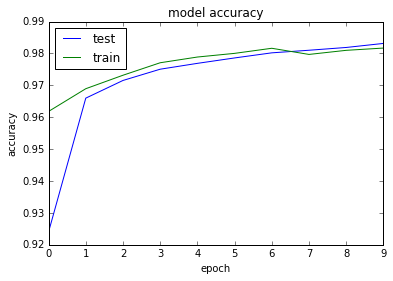

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

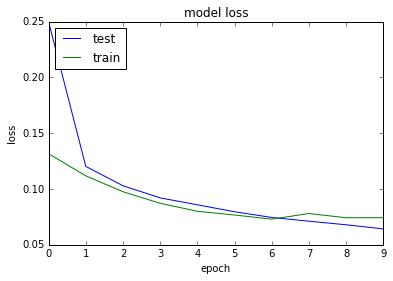

In [12]:
plt.figure(figure)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

In [8]:
y_test_final=np.argmax(model.predict(x_test_final),axis=1)

In [ ]:
y_test=np.where(y_test_final>0,y_test_final,10)

In [15]:
import csv
with open("output_final.csv","w",newline="") as datacsv:
    csvwriter = csv.writer(datacsv,dialect = ("excel"))
    csvwriter.writerow(['ImageId', 'label'])
    for i in range(len(y_test)):
        csvwriter.writerow((i, y_test[i]))